<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningPython/blob/main/Tutorial_curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cruve fit using the example of scipy.

Using the non-linear least squares to fit a function, f, to data.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [14]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [15]:
# Function to be fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

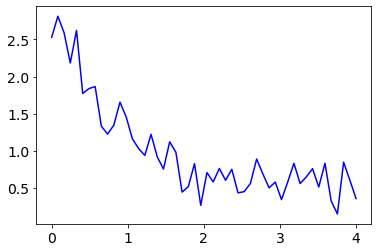

In [16]:
# generating and ploting the data
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

# plot the data
plt.plot(xdata, ydata, 'b-', label='data')

[2.38846936 1.1977295  0.49636645]


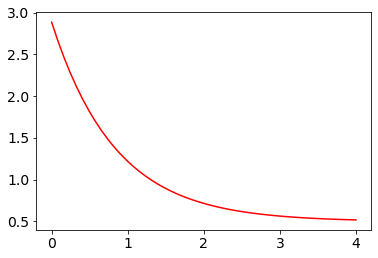

In [17]:
# instanciando o modelo de curve fit
popt, pcov = curve_fit(func, xdata, ydata)

# printando os coeficiente do fit
print(popt)

#plotando o fit
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

[2.33620276 1.         0.4193599 ]


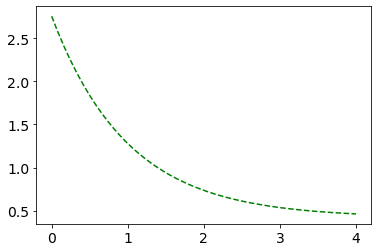

In [18]:
# Inserindo restrições aos modelos
#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5
popt2, pcov2 = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt2)
plt.plot(xdata, func(xdata, *popt2), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))

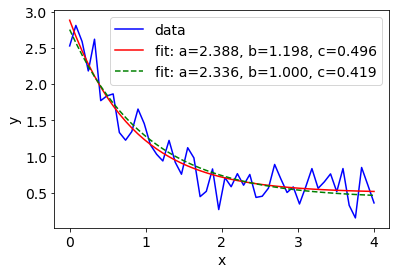

In [19]:
# Plotando as curvas com e sem restrição de dominio de busca
# sem restrição
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# COM restrição
plt.plot(xdata, func(xdata, *popt2), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Usando o lmfit para fazer o ajuste de curva

Non-Linear Least-Squares Minimization and Curve-Fitting for Python

https://stackoverflow.com/questions/47085244/fitting-sin-curve-using-python

In [20]:
pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Ajustando uma curva por meio de uma função seno

[[Model]]
    Model(sinefunction)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 27
    # data points      = 21
    # variables        = 3
    chi-square         = 4.9896e+11
    reduced chi-square = 2.7720e+10
    Akaike info crit   = 507.716776
    Bayesian info crit = 510.850343
    R-squared          = 0.20902312
[[Variables]]
    a:  74028.5209 +/- 40231.0414 (54.35%) (init = 0)
    b: -128642.030 +/- 59368.0585 (46.15%) (init = 30000)
    c:  0.36520455 +/- 0.38785383 (106.20%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.428
    C(b, c) = -0.114


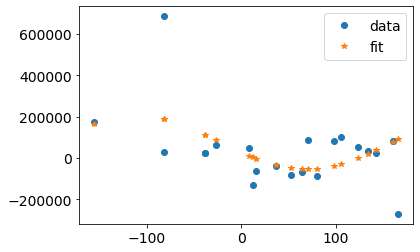

In [21]:
xdeg  = [70.434654, 37.147266, 8.5787086, 161.40877, -27.31284, 80.429482, -81.918106, 52.320129, 64.064552, -156.40771, 12.37026, 15.599689, 166.40984, 134.93636, 142.55002, -38.073524, -38.073524, 123.88509, -82.447571, 97.934402, 106.28793]

y = [86683.961, -40564.863, 50274.41, 80570.828, 63628.465, -87284.016, 30571.402, -79985.648, -69387.891, 175398.62, -132196.5, -64803.133, -269664.06, 36493.316, 22769.121, 25648.252, 25648.252, 53444.855, 684814.69, 82679.977, 103244.58]

import numpy as np
from lmfit import Model

import matplotlib.pyplot as plt

def sinefunction(x, a, b, c):
    return a + b * np.sin(x*np.pi/180.0 + c)

smodel = Model(sinefunction)
result = smodel.fit(y, x=xdeg, a=0, b=30000, c=0)

print(result.fit_report())

plt.plot(xdeg, y, 'o', label='data')
plt.plot(xdeg, result.best_fit, '*', label='fit')
plt.legend()
plt.show()

## Ajustando uma curva seno pro meio da curve_fit do scipy

Sine function coefficients:
[3.40184408 1.34336072]
Covariance of coefficients:
[[ 4.00863994e-02 -6.18762027e-05]
 [-6.18762027e-05  8.95691496e-05]]


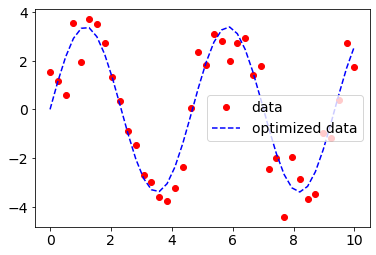

In [22]:
import numpy as np
 
# curve-fit() function imported from scipy
from scipy.optimize import curve_fit
 
from matplotlib import pyplot as plt
 
# numpy.linspace with the given arguments
# produce an array of 40 numbers between 0
# and 10, both inclusive
x = np.linspace(0, 10, num = 40)
 
 
# y is another array which stores 3.45 times
# the sine of (values in x) * 1.334.
# The random.normal() draws random sample
# from normal (Gaussian) distribution to make
# them scatter across the base line
y = 3.45 * np.sin(1.334 * x) + np.random.normal(size = 40)
 
# Test function with coefficients as parameters
def test(x, a, b):
    return a * np.sin(b * x)
 
# curve_fit() function takes the test-function
# x-data and y-data as argument and returns
# the coefficients a and b in param and
# the estimated covariance of param in param_cov
param, param_cov = curve_fit(test, x, y)
 
 
print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)
 
# ans stores the new y-data according to
# the coefficients given by curve-fit() function
ans = (param[0]*(np.sin(param[1]*x)))
 
'''Below 4 lines can be un-commented for plotting results
using matplotlib as shown in the first example. '''
 
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show()

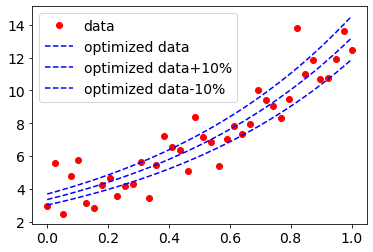

In [23]:
# Aplicação de uma variação de 10% dos valores oriundos do ajuste para observar um intervalo de confiança
x = np.linspace(0, 1, num = 40)
 
y = 3.45 * np.exp(1.334 * x) + np.random.normal(size = 40)
 
def test(x, a, b):
    return a*np.exp(b*x)
 
param, param_cov = curve_fit(test, x, y)
ans = (param[0]*(np.exp(param[1]*x)))

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.plot(x, ans*1.1, '--', color ='blue', label ="optimized data+10%")
plt.plot(x, ans*0.9, '--', color ='blue', label ="optimized data-10%")
plt.legend()
plt.show()

Sine function coefficients:
[-1.03261284e+03  4.68442804e-03]
Covariance of coefficients:
[[4.55901239e+16 2.09928262e+11]
 [2.09928262e+11 9.66653996e+05]]


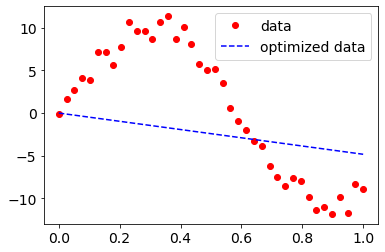

In [33]:
import numpy as np
from scipy.optimize import curve_fit
 
from matplotlib import pyplot as plt
 
x = np.linspace(0, 1, num = 40)
 
# The coefficients are much bigger.
# y = 10.45 * np.sin(1.334 * x) + np.random.normal(size = 40) -> this way works
# y = 10.45 * np.sin(1.334 * x * 2) + np.random.normal(size = 40) -> this way works
# y = 10.45 * np.sin(1.334 * x * 3) + np.random.normal(size = 40)-> this way works
y = 10.45 * np.sin(1.334 * x * 4) + np.random.normal(size = 40)
 
def test(x, a, b):
    return a * np.sin(b * x)
 
param, param_cov = curve_fit(test, x, y)
 
print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)
 
ans = param[0]*(np.sin(param[1]*x))
 
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show()

### Differential equation for curve fit

https://www.geeksforgeeks.org/scipy-integration-of-a-differential-equation-for-curve-fit/

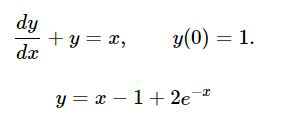

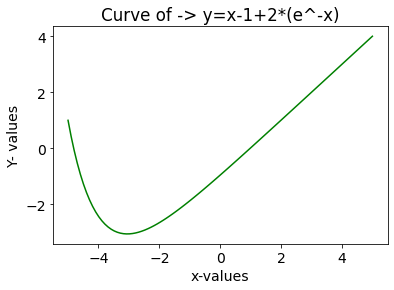

In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
 
# Define a function which calculates the derivative by making dy/dx as
# the subject of formula in the given above equation
def dy_dx(y, x):
    return x - y
 
#Here we define the graph limits for x
xs = np.linspace(-5,5,100)
 
#Initially y=1 given
y0 = 1.0
 
# This scipy.integrate.odeint() integrates the given equation by taking
# 3 parameters odeint(model,y0,t)
# model- the differential equation function
# y0-the initial value of y
# t- the timepoints for which we need to plot the curve
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()
 
# By using the matplotlib.pyplot library we plot the curve after integration
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x-values")
plt.ylabel("Y- values")
plt.title('Curve of -> y=x-1+2*(e^-x)')
plt.plot(xs, ys,color='green')